In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root
import h5py
import os
import analysis

## Run code on qlua output

In [2]:
cfgbase = 'cl3_16_48_b6p1_m0p2450'
job_num = 15909
base = './output/' + cfgbase + '_' + str(job_num)

# base = './output/p2222_cfg200'    #just run with one configuration for comparison

props, threepts = analysis.readfile(base)

V = analysis.get_hypervolume()

In [3]:
mom_list = analysis.get_mom_list()
s = 0    # TODO seed this with something random
props_boot = analysis.bootstrap(props, seed = s)
threept_boot = analysis.bootstrap(threepts, seed = s)

In [4]:
props_inv = analysis.invert_prop(props_boot)
Γ = analysis.amputate(props_inv, threept_boot)
Zq = analysis.quark_renorm(props_inv)
Γ_B, Γ_B_inv = analysis.born_term()
# TODO what happens if I don't invert Γ_B?
# Z = analysis.get_Z(Zq, Γ, Γ_B_inv)
Z = analysis.get_Z(Zq, Γ, Γ_B)

In [5]:
#compare with analysis_EXAMPLE.py for p2222 and cfg 200
print('Two point')
print(props_boot['p2222'][0, 0])
print('Two point inverse')
print(props_inv['p2222'][0, 0])
print('Quark renormalization')
print(Zq['p2222'])

Two point
[[[[ 1.00169188e+05+8.8817842e-15j -1.18245802e+01+4.1174782e+01j
    -4.60406484e+04+2.0117902e+04j -4.61460664e+04-4.6094816e+04j]
   [ 3.79798706e+02-4.4196582e+02j -8.88544769e+01+5.3636292e+01j
     4.91865173e+02+1.8216156e+02j -3.51045349e+02-5.4571939e+00j]
   [-3.10082642e+02+2.4945125e+02j -9.85078216e-01+2.0149006e+01j
     4.35908844e+02-1.0677848e+03j -2.53324871e+01-2.9419995e+02j]]

  [[-1.18245802e+01-4.1174782e+01j  1.00252586e+05-1.5099033e-14j
    -4.62316758e+04+4.6071414e+04j  4.61181602e+04+1.9991887e+04j]
   [-5.72440338e+01-1.5144237e+01j  3.57348602e+02-4.3938620e+02j
    -1.00586472e+02+9.8435889e+02j  4.64521698e+02-1.5925314e+02j]
   [-1.27028877e+02+3.3230618e+01j -4.05430817e+02+4.2651038e+02j
     3.36761383e+02-1.5443007e+02j  1.57013428e+02-3.5062839e+02j]]

  [[ 4.60406484e+04+2.0117902e+04j  4.62316758e+04+4.6071414e+04j
     1.00223141e+05-1.2523316e-13j  7.09929428e+01+1.9877911e+01j]
   [ 5.42110840e+02-1.5599498e+02j  2.14649918e+02+5.09

In [6]:
μ, σ = analysis.get_statistics_Z(Z)
print(μ)
print(σ)

{'p2222': (0.51933306+5.424956e-10j), 'p2224': (0.29577217-1.746264e-10j), 'p2226': (0.17994773+3.827989e-12j), 'p3332': (0.30352226-6.280056e-11j), 'p3334': (0.21018548-5.575022e-10j), 'p3336': (0.14425966+5.6859023e-10j), 'p3338': (0.10491681+5.483299e-10j), 'p4444': (0.16658144+2.963707e-10j), 'p4446': (0.12254062-1.11927266e-10j), 'p4448': (0.09322321-3.3121572e-10j)}
{'p2222': 7.4159725e-05, 'p2224': 3.3861383e-05, 'p2226': 1.617677e-05, 'p3332': 2.4272149e-05, 'p3334': 1.5539697e-05, 'p3336': 9.720964e-06, 'p3338': 6.231766e-06, 'p4444': 9.282887e-06, 'p4446': 6.7346527e-06, 'p4448': 4.344488e-06}


<IPython.core.display.Javascript object>


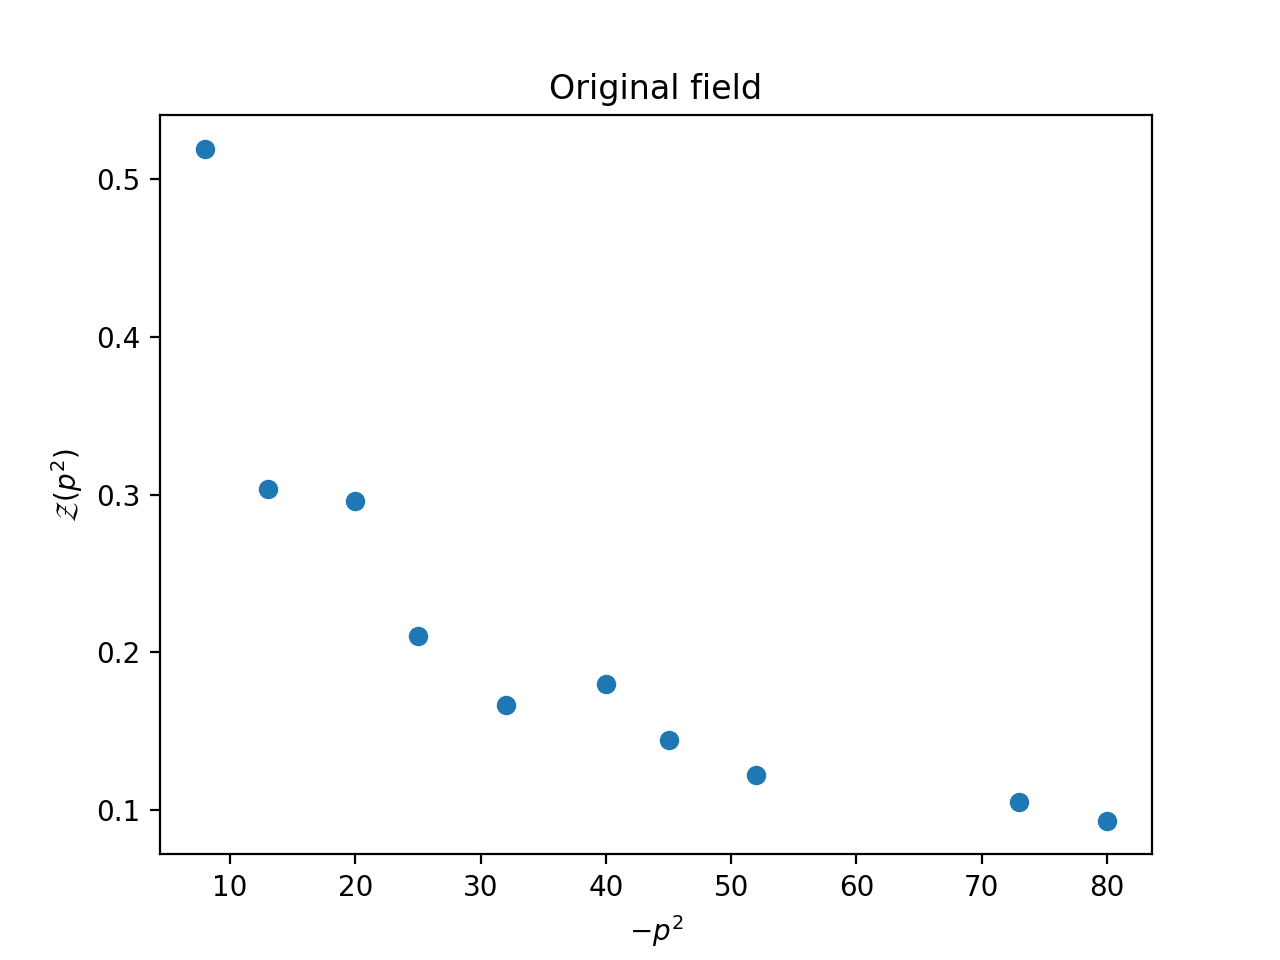

In [9]:
p_squared = np.array([np.abs(analysis.square(p)) for p in mom_list])
μ_list = np.array([μ[analysis.plist_to_string(p)] for p in mom_list])
σ_list = np.array([σ[analysis.plist_to_string(p)] for p in mom_list])
plt.figure()
plt.errorbar(p_squared, np.abs(μ_list), yerr = np.abs(σ_list), fmt = 'o')
plt.ylabel('$\mathcal{Z}(p^2)$')
plt.xlabel('$-p^2$')
plt.title('Original field')
plt.show()